# Load and preprocess data 

In [1]:
# import essentiell modules
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# exclude sub 1,2,4,7,18,24 wegen Aufzeichungsschwierigkeiten
df01=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-03.csv', header=0)
df02=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-05.csv', header=0)
df03=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-06.csv', header=0)
df04=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-08.csv', header=0)
df05=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-09.csv', header=0)
df06=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-10.csv', header=0)
df07=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-11.csv', header=0)
df08=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-12.csv', header=0)
df09=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-13.csv', header=0)
df10=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-14.csv', header=0)
df11=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-15.csv', header=0)
df12=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-16.csv', header=0)
df13=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-17.csv', header=0)
df14=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-19.csv', header=0)
df15=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-20.csv', header=0)
df16=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-21.csv', header=0)
df17=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-22.csv', header=0)
df18=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-23.csv', header=0)
df19=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-26.csv', header=0)
df20=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-27.csv', header=0)
df21=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-28.csv', header=0)
df22=pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/statistics/containig_all_files/physio_sub-29.csv', header=0)


In [3]:
# concatenate all puls data from all subjects into one df
df = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
print(df)

      heartrate Subject Bedingung  Time Timepoint
0      53.81935  Sub-03     music     1   stressI
1      53.86667  Sub-03     music     2   stressI
2      53.77501  Sub-03     music     3   stressI
3      53.71714  Sub-03     music     4   stressI
4      53.82829  Sub-03     music     5   stressI
...         ...     ...       ...   ...       ...
1937   69.81132  Sub-29     water  1938  stressII
1938   69.66156  Sub-29     water  1939  stressII
1939   69.49020  Sub-29     water  1940  stressII
1940   69.46305  Sub-29     water  1941  stressII
1941   69.56410  Sub-29     water  1942  stressII

[42724 rows x 5 columns]


## Analysis of heartrate data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, heartrate data seperated into two groups showed no normal distribution even not after beeing logharithmically transformed (p< 0,05).
While analysing each group seperatly for each timepoint showed a normal distribution (p>0,05).


Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Puls-Werte waren für alle Gruppen nicht normalverteilt (p < .05). In der Analyse der einzelnen Gruppen zu jedem Zeitpunkt zeigte sich allerdings jeweils eine Normalverteilung.

In [5]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Bedingung', dv='heartrate')

/home/rebekka/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
music,0.975721,0.0,False
water,0.967066,0.0,False


In [7]:
# check for normal distribution in the group listening to water
df_norm_w=df.loc[(df['Bedingung'] == ('water'))]
pg.normality(df_norm_w, group='Time', dv='heartrate')

,W,pval,normal
1,0.951181,0.659078,True
2,0.957229,0.736712,True
3,0.951555,0.663879,True
4,0.945963,0.592900,True
5,0.946944,0.605185,True
...,...,...,...
1938,0.945242,0.583929,True
1939,0.945109,0.582276,True
1940,0.947856,0.616694,True
1941,0.950180,0.646250,True


In [8]:
#check for normal distribution in the group listening to music
df_norm_m=df.loc[(df['Bedingung'] == ('music'))]
pg.normality(df_norm_m, group='Time', dv='heartrate')

,W,pval,normal
1,0.974923,0.931447,True
2,0.972204,0.907864,True
3,0.971232,0.898682,True
4,0.968805,0.874216,True
5,0.966734,0.851786,True
...,...,...,...
1938,0.968271,0.868562,True
1939,0.970011,0.886635,True
1940,0.970834,0.894816,True
1941,0.971563,0.901857,True


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05).

Homogenität des Varianzen ist gegeben

Homogenität der Fehlervarianzen zwischen den Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [8]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df, group='Time', dv='heartrate')

,W,pval,equal_var
levene,0.415,1.0,True


## Test for sphericity

Sphericity was met (p>0,05)

Für die Pulsdaten liegt Sphärizität vor (Mauchly Test: p>0,05)


Sphärizität ist eine der wichtigsten Voraussetzungen der mixed ANOVA. Sphärizität ist eine Annahme, die bei allen Verfahren mit Messwiederholung gemacht wird, die mehr als zwei Stufen haben. Bei vorliegender Sphärizität sind die Differenzen aller Stufen der unabhängigen Variablen gleich. Man sagt auch, das Homoskedastizität zwischen den Stufen vorliegt.

In [9]:
pg.sphericity(df, subject='Subject', dv='heartrate', within='Time')

/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:955: RuntimeWarning: overflow encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/distribution.py:956: RuntimeWarning: divide by zero encountered in log
  logW = np.log(W)


(True, 0.0, -inf, 1884710, 1.0)

## Descriptive statistics

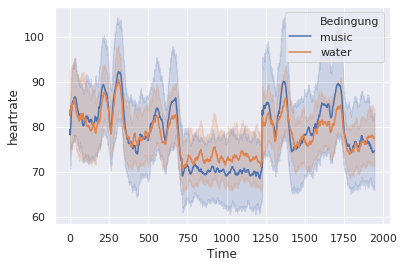

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
sns.lineplot(x=("Time"), y="heartrate", hue="Bedingung", data=df)

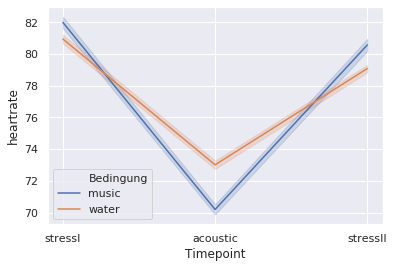

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
sns.lineplot(x=("Timepoint"), y="heartrate", hue="Bedingung", sort=False, data=df)

In [11]:
df.groupby(['Timepoint', 'Bedingung'])['heartrate'].agg(['mean', 'std']).round(2)

mean    std
Timepoint Bedingung              
acoustic  music      70.20  12.79
          water      73.01  10.12
stressI   music      81.99  16.09
          water      80.94  12.07
stressII  music      80.57  17.76
          water      79.08  10.38

# Conduct a mixed (split-plot) ANOVA
There was no statistically significant interaction between time and group, punc = 0,093.

no significant Interaction detected (p>0,05)--> no post-hoc tests
Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen ( p=0,093, np2=0,112)

In [6]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='heartrate', within='Timepoint', between='Bedingung', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2  eps
-----------  --------  -----  -----  -------  ------  -------  -----  -----
Bedingung       0.148      1     20    0.148   0.000    0.986  0.000  -
Timepoint    1228.042      2     40  614.021  50.249    0.000  0.715  0.819
Interaction    61.651      2     40   30.825   2.523    0.093  0.112  -



## Conduct repeated measure ANOVAs for the seperate groups (music and water)

The rm-ANOVA shows a significant difference between the stresstests and the acoustic intervention (p< 0,05)
The post hoc tests show the significance for all 3 conditions.

Die RM ANOVA zeigte eine signifikante Interaktion bei der Analyse der einzelnen Zeitpunkte in den separierten Gruppen. Es liegt also eine signifikante Pulsänderung jeweils mit Änderung der Kondition in beiden Gruppen vor (p< 0,05), wie die post hoc Tests zeigen. 

In [9]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost = pg.rm_anova(dv='heartrate', within='Timepoint', subject='Subject', data=df_norm_m)
# Pretty printing of ANOVA summary
pg.print_table(prepost)


ANOVA SUMMARY

Source       ddof1    ddof2       F    p-unc    p-GG-corr    np2    eps  sphericity      W-spher    p-spher
---------  -------  -------  ------  -------  -----------  -----  -----  ------------  ---------  ---------
Timepoint        2       20  29.661    0.000        0.000  0.748  0.603  False             0.342      0.008



In [11]:
t=pg.pairwise_ttests(dv='heartrate', within='Timepoint', subject='Subject', data=df_norm_m)
pg.print_table(t)


POST HOC TESTS

Contrast    A         B         Paired    Parametric          T        dof  Tail         p-unc                             BF10    hedges
----------  --------  --------  --------  ------------  -------  ---------  ---------  -------  -------------------------------  --------
Timepoint   stressI   acoustic  True      True           47.359  13350.430  two-sided    0.000                          inf         0.796
Timepoint   stressI   stressII  True      True           11.384   7864.000  two-sided    0.000  101399999999999998406164480.000     0.084
Timepoint   acoustic  stressII  True      True          -39.439  13494.600  two-sided    0.000                          inf        -0.653



/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/parametric.py:198: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/bayesian.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/effsize.py:672: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/bayesian.py:151: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


In [12]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost_w = pg.rm_anova(dv='heartrate', within='Timepoint', subject='Subject', data=df_norm_w)
# Pretty printing of ANOVA summary
pg.print_table(prepost_w)


ANOVA SUMMARY

Source       ddof1    ddof2       F    p-unc    np2    eps
---------  -------  -------  ------  -------  -----  -----
Timepoint        2       20  20.839    0.000  0.676  0.846



In [13]:
t_w=pg.pairwise_ttests(dv='heartrate', within='Timepoint', subject='Subject', data=df_norm_w)
pg.print_table(t_w)


POST HOC TESTS

Contrast    A         B         Paired    Parametric          T        dof  Tail         p-unc                                                                                                                                                                                                                                                 BF10    hedges
----------  --------  --------  --------  ------------  -------  ---------  ---------  -------  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------
Timepoint   stressI   acoustic  True      True           41.368  13164.200  two-sided    0.000                                                                                                                                                                                             

/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/parametric.py:198: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/bayesian.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
/home/rebekka/anaconda3/lib/python3.6/site-packages/pingouin/effsize.py:672: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "
